INTELIGENCIA ARTIFICIAL

In [4]:
#libreria scikit-learn
! pip install scikit-learn

In [3]:
! pip install session-info

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8025 sha256=d429f447fc2c8c46367f86d6ff9db27f359174e7ed83caf1995176c178afcc26
  Stored in directory: /Users/macbook/Library/Caches/pip/wheels/4e/56/35/a748fc57279a4b84d0b332879445fed1ad8478e7257986b015
Successfully built session-info


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import pickle
import session_info

session_info.show()

In [13]:
# Cargar datos
load_iris(as_frame=True)



{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [14]:
# Cargar datos
load_iris(as_frame=True)['data']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
dict_iris = load_iris(as_frame=True)
dict_iris# Cargar datos
model = SVC()  #Definir modelo
model.fit(X=dict_iris['data'][:130], y=dict_iris['target'][:130])  #Entrenar modelo con conjunto de entrenamiento (primeros 130 registros)
y_pred = model.predict(dict_iris['data'][130:])

In [16]:
y_pred

array([2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
y_test = dict_iris['target'][130:].values
print(f"Estimación:\n {y_pred[:10]}") # Predicción
print(f"Real:      \n {y_test[:10]}") # Realidad con la variable objetivo del conjutno de pruebas (últimos 30 registros)
# print(f"Accuracy:  \n {accuracy_score(y_test, y_pred):.2f}")

Estimación:
 [2 2 2 1 2 2 2 2 1 2]
Real:      
 [2 2 2 2 2 2 2 2 2 2]


PASO 1: Recolectar informacion.

In [18]:
# Cargar datos
iris_dict = load_iris(as_frame=True)
iris_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [19]:
# Leer DataFrame
df = iris_dict['frame']
print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
df.shape

(150, 5)

In [21]:
# Leer etiquetas de salida
etiquetas = iris_dict['target_names']
etiquetas

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [22]:
# Revisar balance de datos con unique.  
df['target'].unique()

array([0, 1, 2])

In [23]:
# Revisar balance de datos value counts. 
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

PASO 2: PREPARAR DATOS 
- lo mas importante es revisar valores faltantes, revisar valores duplicados. ( primero que nada )
- ller matriz de caracteristicas con "x" # leer vector objetivo de "y"
- separar dataset en "entrenamiento_validacion" y "prueba"(80/20)
- separar entrenamiento_validacion en "entrenamiento" y "validacion"(80/20).


In [24]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [25]:
# Revisar valores faltantes o nulos # si hay valores faltantes me va marcar verdadero, en este caso no hay valores faltantes.
# por eso marca False en todos. 
df.isnull().any()


sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target               False
dtype: bool

In [26]:
# Revisar valores duplicados
df.duplicated().sum()

1

In [27]:
# revisar cual es ese valor duplicado 
df[df.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
142,5.8,2.7,5.1,1.9,2


In [28]:
# ahora revisar con cual valor es con el que esta duplicado 
df[df.duplicated(keep=False)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


In [29]:
# para eliminar algun duplicado podriamos utilizar el drop_duplicates()
df[df.duplicated(keep=False)] # tomando como referencia la funcion pasada 
# df = df.drop_duplicates()   <- con esta opcion eliminas el duplicado 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


In [30]:
# Leer matriz de características "X"
X = df.drop(columns=['target']).values # otra opción es iris_dict['data']

# Leer vector objetivo "y"
y = df['target'].values # otra opción es iris_dict['target']

# Ayuda para elegir cual modelo me sirve mas con ejemplos 
train_test_split?


Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [31]:
# Leer matriz de características "X"
X = df.drop(columns=['target']).values # otra opción es iris_dict['data']

# Leer vector objetivo "y"
y = df['target'].values # otra opción es iris_dict['target']

# Ayuda para elegir cual modelo me sirve mas con ejemplos 
#train_test_split?

# Separar dataset en "entrenamiento_validacion" y "prueba" (80/20)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Separar entrenamiento_validacion en "entrenamiento" y "validacion" (80/20)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)




PASO 3: ESCOGER EL MODELO


In [32]:
# seleccionar modelo de clasificacion "SVC" (SVM)
model = SVC(kernel= 'linear')


PASO 4: ENTRENAR EL MODELO 

In [43]:
#ENTRENAR EL MODELO 
model.fit(X_train,y_train)

SVC()

PASO 5: EVALUAR EL MODELO 


In [44]:

# Evaluar el modelo con los datos de entrenamiento
score_train = model.score(X_train, y_train)
#print(f'{score_train = :.3f}')
print('score_train: ', score_train)

# Otra manera de evaluar los datos de entrenamiento
y_train_pred = model.predict(X_train)
score_train = accuracy_score(y_train, y_train_pred)
#print(f'{score_train = :.3f}')
print('score_train: ', score_train)

# Evaluar los datos de validación
y_val_pred = model.predict(X_val)
score_val = accuracy_score(y_val, y_val_pred)
#print(f'{score_val = :.3f}')
print('score_val: ', score_val)

score_train:  0.96875
score_train:  0.96875
score_val:  0.9166666666666666


In [35]:
# crear reporte con metricas de clasiicacion 
print(classification_report(y_val, y_val_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.71      0.83         7
           2       0.82      1.00      0.90         9

    accuracy                           0.92        24
   macro avg       0.94      0.90      0.91        24
weighted avg       0.93      0.92      0.91        24



In [36]:
# CREAR MATRIZ DE CONFUSION PARA LOS DATOS 
cm = confusion_matrix(y_val, y_val_pred, labels= model.classes_)
print(cm)

[[8 0 0]
 [0 5 2]
 [0 0 9]]


[[8 0 0]
 [0 5 2]
 [0 0 9]]


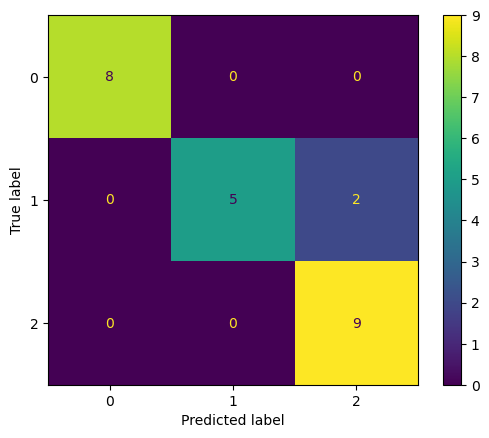

In [37]:
# CREAR MATRIZ DE CONFUSION PARA LOS DATOS CON GRAFICA 
cm = confusion_matrix(y_val, y_val_pred, labels= model.classes_)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot();

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.71      0.83         7
           2       0.82      1.00      0.90         9

    accuracy                           0.92        24
   macro avg       0.94      0.90      0.91        24
weighted avg       0.93      0.92      0.91        24

[[8 0 0]
 [0 5 2]
 [0 0 9]]
[[8 0 0]
 [0 5 2]
 [0 0 9]]


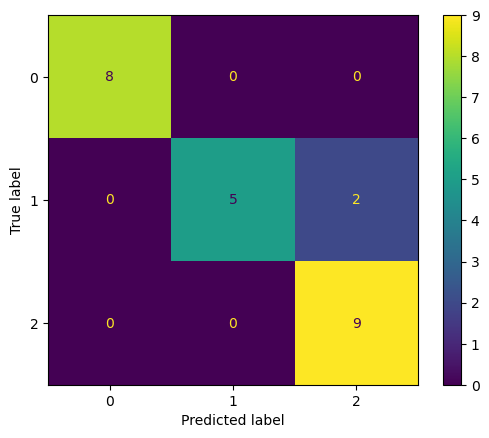

In [38]:
# AHORA VAMOS A JUNTAR LOS TRES DE ARRIBA EN UNA SOLA LINEA 
# crear reporte con metricas de clasiicacion 
print(classification_report(y_val, y_val_pred))
# CREAR MATRIZ DE CONFUSION PARA LOS DATOS 
cm = confusion_matrix(y_val, y_val_pred, labels= model.classes_)
print(cm)
# CREAR MATRIZ DE CONFUSION PARA LOS DATOS CON GRAFICA 
cm = confusion_matrix(y_val, y_val_pred, labels= model.classes_)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot();

PASO 6: AJUSTAR HIPERPARAMETROS

In [39]:
model = SVC()
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [47]:
# Seleccionar modelo
model = SVC()

# Definir hiperparámetros a ajustar
parameters_grid = {'kernel':('rbf', 'linear', 'sigmoid', 'poly'), 'C':[1, 3, 7, 10], 'gamma': ['scale', 'auto']} # C inverso a la regularización

# Utilizar método "grid search" con "cross-validation"
model_adj = GridSearchCV(model, parameters_grid, cv=5, scoring='accuracy') # otro puede ser: f1_weighted Weighted porque tenemos más de dos clases
model_adj.fit(X_train_val, y_train_val) # usa cross-validation

# Evaluar el modelo
score = model_adj.score(X_train_val, y_train_val)
print(f'{score = :.3f}')

score = 0.967


In [48]:
# Leer resultado de GridSearchCV
model_adj.cv_results_ # pd.DataFrame(model_adj.cv_results_).sort_values(by='rank_test_score').head()
pd.DataFrame(model_adj.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
16,0.001035,0.000181,0.000669,0.000045,7,scale,rbf,"{'C': 7, 'gamma': 'scale', 'kernel': 'rbf'}",0.958333,1.000000,1.0,1.0,0.875,0.966667,0.048591,1
0,0.001297,0.000175,0.001075,0.000460,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.958333,0.958333,1.0,1.0,0.875,0.958333,0.045644,2
29,0.000790,0.000060,0.000553,0.000023,10,auto,linear,"{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}",0.958333,0.958333,1.0,1.0,0.875,0.958333,0.045644,2
28,0.001082,0.000125,0.000810,0.000154,10,auto,rbf,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.958333,0.958333,1.0,1.0,0.875,0.958333,0.045644,2
25,0.000878,0.000161,0.000638,0.000148,10,scale,linear,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}",0.958333,0.958333,1.0,1.0,0.875,0.958333,0.045644,2


In [49]:
print('Mejor score del modelo: ', round(model_adj.best_score_, 4))
print('Mejores parámetros encontrados: ', model_adj.best_params_)

Mejor score del modelo:  0.9667
Mejores parámetros encontrados:  {'C': 7, 'gamma': 'scale', 'kernel': 'rbf'}


EVALUACION FINAL 

In [50]:
# Estimar y evaluar los datos de prueba
y_test_pred = model_adj.predict(X_test)
score_test = accuracy_score(y_test, y_test_pred)
print(f'{score_test = :.3f}')

score_test = 1.000


In [51]:
# Guardar modelo
model = model_adj
model_type = 'classification'
library_version = 'svc_sklearn' + '_' + sklearn.__version__.replace('.','_')
model_name = model_type + '_' + library_version + '.pickle'

pickle.dump(model, open(model_name, 'wb'))

print(type(model))
print('Saved model: ' + model_name)

<class 'sklearn.model_selection._search.GridSearchCV'>
Saved model: classification_svc_sklearn_1_2_2.pickle


PASO 7 : ESTIMAR 

In [52]:
print(model_name)

classification_svc_sklearn_1_2_2.pickle


In [53]:
clf_model = pickle.load(open(model_name, 'rb'))

In [55]:
X_new = np.array([[3.0, 2.0, 1.0, 0.2] ,
                  [4.0, 2.2, 3.8, 1.1] ,
                  [5.3, 2.5, 4.6, 1.9]])

In [56]:
y_new = clf_model.predict(X_new)
print(y_new)

[0 1 2]


In [57]:
dictionary = {0:'setosa', 1:'versicolor', 2:'virginica'}
y_new_labels = [dictionary[i] for i in y_new]
print(y_new_labels)

['setosa', 'versicolor', 'virginica']
